In [1]:
!pip install scikit-optimize
!pip install setuptools wheel numpy scipy
!pip install -U scikit-learn
!pip install lightgbm
!pip install xgboost

Requirement already up-to-date: scikit-learn in c:\users\caioa\appdata\local\continuum\anaconda3\lib\site-packages (0.22.1)


In [2]:
conda install -c conda-forge xgboost=0.6a2

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - xgboost=0.6a2

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [4]:
import pandas as pd
import numpy as np

# Dataset Loading
from sklearn.datasets import load_iris, make_friedman2, make_friedman1, make_regression

# Plotting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})

# Pre processing and manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib

# metrics and hyperparameter optimization
from sklearn.metrics import roc_auc_score, mean_squared_error, mean_absolute_error
from skopt import dummy_minimize
from skopt import gp_minimize

# models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree
import xgboost
import lightgbm as lbm
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\caioa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [36]:
#importando as DBs
db_teste = pd.read_csv(r'./test.csv')
db_treino = pd.read_csv(r'./train.csv')
db_teste_copy = db_teste

In [6]:
#importando SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [7]:
#definindo DB e target 
X = db_treino.drop(['target', 'ID_code'], axis=1)
y = db_treino['target']

In [32]:
db_teste = db_teste.drop(['ID_code'], axis=1)
db_teste

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,6.9937,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,6.3545,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,5.7341,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,8.9032,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [8]:
#separando treino e testes da DB e target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

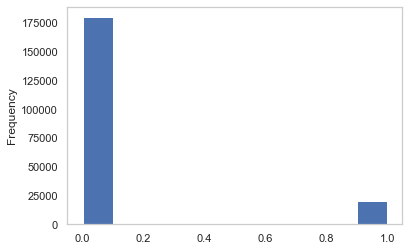

In [9]:
#plotando a variável target para verificar se está balanceada
y.plot.hist()

In [10]:
#utilizando SMOTE para balancear as amostras
%time
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

Wall time: 0 ns


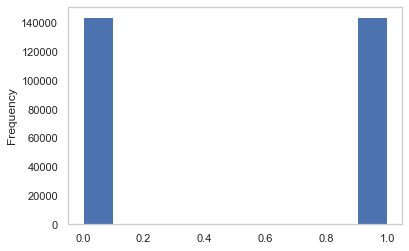

In [11]:
#verificando o resultado
y_train.plot.hist()

In [ ]:
#comparando os modelos para verificar qual utilizar
#isso demorou MUITO pra rodar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# criando uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    #SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()]

# criando uma funçào para rodas o pipeline 
for clf in classifiers:
    # ajustando o modelo
    clf.fit(X_train, y_train)
    # armazenando o nome do modelo
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("="*30)
    print(name)
    # imprimindo os resultados
    print('****Results****')
    # fazendo predições
    # calculando as métricas
    y_pred = clf.predict(X_test)
    # imprimindo as métricas
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))

In [12]:
y_train.value_counts()

1    143922
0    143922
Name: target, dtype: int64

In [13]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression())])
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [14]:
pipe_lr.score(X_test, y_test)

0.786275

In [15]:
y_pred = pipe_lr.predict(X_test)
p = pipe_lr.predict_proba(X_test)

In [16]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.786275
Precision: 0.28707099200752234
Recall: 0.7594527363184079
F1 Score: 0.4166496076424428


In [17]:
?LogisticRegression

In [18]:
#verificando a documentação do LGBMClassifier
?LGBMClassifier

In [19]:
#observando o shape de treinos e testes após SMOTE
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((287844, 200), (40000, 200), (287844,), (40000,))

In [20]:
y_train.dtypes

dtype('int64')

In [21]:
#verificando o resultado da AUC no dataset teste
p = pipe_lr.predict(X_test)
roc_auc_score(y_test, p)

0.7743622769974475

In [22]:
p_df = pd.DataFrame(p)
p_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
39995,0
39996,0
39997,0
39998,1


In [43]:
#buscando hiperparametros

def treinar_modelo(params):
    lrn_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    print(params, '\n')
    
    mdl_pipe = Pipeline([('scl', StandardScaler()),
                        ('pca', PCA(n_components=150)),
                        ('clf', LGBMClassifier(learning_rate=lrn_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                        subsample=subsample, colsample_bytree=colsample_bytree, random_state=0, subsample_freq=1, 
                         n_estimators=200))])
    mdl_pipe.fit(X_train, y_train)
    
    p2 = mdl_pipe.predict_proba(X_test)[:,1] #.astype('int32')
    
    # Queremos minimizar o auc score
    return -roc_auc_score(y_test, p2)

# Definindo espaço de busca
space = [(1e2, 1e4, 'log-uniform'), #learning rate
         (2, 128), # num_leaves
         (1, 1000), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

# fazendo o fit do modelo com 30 calls
resultado = dummy_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[9871.192514273254, 74, 768, 0.1717182255328889, 0.9991364637917304] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 39.2842
Function value obtained: -0.7695
Current minimum: -0.7695
Iteration No: 2 started. Evaluating function at random point.
[296.604648999388, 3, 973, 0.4185152041039071, 0.7027714331231321] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 38.0878
Function value obtained: -0.7738
Current minimum: -0.7738
Iteration No: 3 started. Evaluating function at random point.
[7431.528396574379, 22, 255, 0.3476098410856614, 0.5720933436155843] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 40.3997
Function value obtained: -0.7654
Current minimum: -0.7738
Iteration No: 4 started. Evaluating function at random point.
[770.7362534461022, 30, 926, 0.5576932134996663, 0.9225658221213098] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 

In [52]:
db_teste = db_teste.drop(['ID_code'], axis=1)
db_teste.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [70]:
mdl_pipe = Pipeline([('scl', StandardScaler()),
                        ('pca', PCA(n_components=150)),
                        ('clf', LGBMClassifier(learning_rate=0.5949263684475, num_leaves=56, min_child_samples=16,
                        subsample=0.7841021894386982, colsample_bytree=0.23763684029862592, random_state=0, subsample_freq=1, 
                         n_estimators=200))])
mdl_pipe.fit(X_train, y_train)
    
p2 = mdl_pipe.predict_proba(X_test)[:,1]
p3 = mdl_pipe.predict(db_teste)

In [83]:
roc_auc_score(y_test, p2)

0.8228237633400535

In [74]:
space = [(1e-4, 1e-2, 'log-uniform'), #learning rate
         (2, 128), # num_leaves
         (1, 1000), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)]

resultados_gp = gp_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.009871192514273255, 120, 129, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 69.3337
Function value obtained: -0.8245
Current minimum: -0.8245
Iteration No: 2 started. Evaluating function at random point.
[0.0006210998932353835, 51, 670, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 78.2258
Function value obtained: -0.8497
Current minimum: -0.8497
Iteration No: 3 started. Evaluating function at random point.
[0.0004232013397179603, 68, 444, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 50.5854
Function value obtained: -0.8449
Current minimum: -0.8497
Iteration No: 4 started. Evaluating function at random point.
[0.006728589742129336, 60, 431, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random po

In [75]:
mdl_pipe = Pipeline([('scl', StandardScaler()),
                        ('pca', PCA(n_components=150)),
                        ('clf', LGBMClassifier(learning_rate=0.01, num_leaves=2, min_child_samples=87,
                        subsample=0.05, colsample_bytree=0.7123882677749224, random_state=0, subsample_freq=1, 
                         n_estimators=200))])
mdl_pipe.fit(X_train, y_train)
    
p2_xx = mdl_pipe.predict_proba(X_test)[:,1]
p3_xx = mdl_pipe.predict(db_teste)

In [76]:
roc_auc_score(y_test, p2_xx)

0.8441653115744236

In [78]:
p3xx_df = pd.DataFrame(p3_xx)
p3xx_df['ID_code'] = db_teste_copy['ID_code']

In [79]:
p3xx_df.head()

,0,ID_code
0,1,test_0
1,1,test_1
2,0,test_2
3,1,test_3
4,0,test_4


In [80]:
p3xx_df = p3xx_df.rename(columns={0: 'target'})
p3xx_df.head()

,target,ID_code
0,1,test_0
1,1,test_1
2,0,test_2
3,1,test_3
4,0,test_4


In [81]:
p3xx_df.to_csv(r'./chal_testxx.csv')